In [2]:
import tensorflow as tf
import pandas as pd
import sklearn
import PIL
print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [3]:
from tensorflow.keras.models import load_model

model = load_model("sustainable_image_cnn.keras")  # or sustainable_image_cnn.h5 if saved in h5 format
print("✅ Model loaded successfully!")
model.summary()



✅ Model loaded successfully!


C:\Users\Thirupathiamma\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,338,180 (85.21 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,169,091 (42.61 MB)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET\TEST"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print("\n✅ Model Evaluation Completed!")
print(f"📉 Loss: {loss:.4f}")
print(f"📊 Accuracy: {accuracy:.4f}")


Found 2512 images belonging to 2 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.9076 - loss: 0.2548

✅ Model Evaluation Completed!
📉 Loss: 0.2548
📊 Accuracy: 0.9076


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step
✅ Classification Report:

                    precision    recall  f1-score   support

Non-Recyclable (O)       0.89      0.95      0.92      1400
    Recyclable (R)       0.93      0.86      0.89      1112

          accuracy                           0.91      2512
         macro avg       0.91      0.90      0.91      2512
      weighted avg       0.91      0.91      0.91      2512



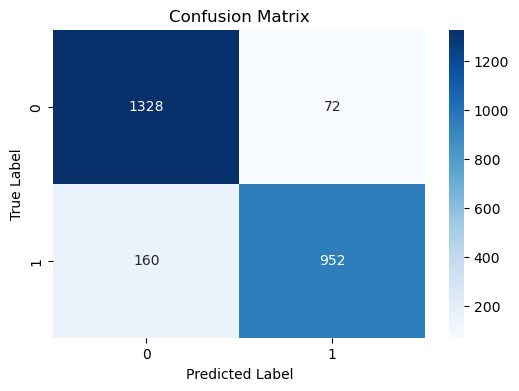

In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

print("✅ Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Non-Recyclable (O)", "Recyclable (R)"]))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [10]:
import os

folder_path = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET\TEST\R"

files = os.listdir(folder_path)
print("Images inside TEST/R folder:")
for f in files:
    print(f)


Images inside TEST/R folder:
R_10000.jpg
R_10001.jpg
R_10002.jpg
R_10003.jpg
R_10004.jpg
R_10005.jpg
R_10006.jpg
R_10007.jpg
R_10008.jpg
R_10009.jpg
R_10010.jpg
R_10011.jpg
R_10012.jpg
R_10013.jpg
R_10014.jpg
R_10015.jpg
R_10016.jpg
R_10017.jpg
R_10018.jpg
R_10019.jpg
R_10020.jpg
R_10021.jpg
R_10022.jpg
R_10023.jpg
R_10024.jpg
R_10025.jpg
R_10026.jpg
R_10027.jpg
R_10028.jpg
R_10029.jpg
R_10030.jpg
R_10031.jpg
R_10032.jpg
R_10033.jpg
R_10034.jpg
R_10035.jpg
R_10036.jpg
R_10037.jpg
R_10038.jpg
R_10039.jpg
R_10040.jpg
R_10041.jpg
R_10042.jpg
R_10043.jpg
R_10044.jpg
R_10045.jpg
R_10046.jpg
R_10047.jpg
R_10048.jpg
R_10049.jpg
R_10050.jpg
R_10051.jpg
R_10052.jpg
R_10053.jpg
R_10054.jpg
R_10055.jpg
R_10056.jpg
R_10057.jpg
R_10058.jpg
R_10059.jpg
R_10060.jpg
R_10061.jpg
R_10062.jpg
R_10063.jpg
R_10064.jpg
R_10065.jpg
R_10066.jpg
R_10067.jpg
R_10068.jpg
R_10069.jpg
R_10070.jpg
R_10071.jpg
R_10072.jpg
R_10073.jpg
R_10074.jpg
R_10075.jpg
R_10076.jpg
R_10077.jpg
R_10078.jpg
R_10079.jpg
R_10080.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
Prediction: R (Recyclable) | Probability(R): 0.638


Text(0.5, 1.0, 'R (Recyclable) — 0.638')

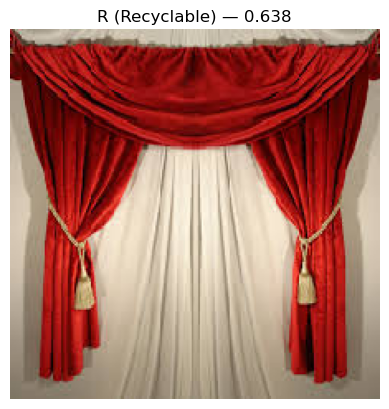

In [6]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET\TEST\R\R_10000.jpg"  # change if you want another file
img = image.load_img(img_path, target_size=(224,224))
arr = image.img_to_array(img)/255.0
arr = np.expand_dims(arr, 0)

prob = float(model.predict(arr)[0][0])
label = "R (Recyclable)" if prob >= 0.5 else "O (Non-Recyclable)"
print("Prediction:", label, "| Probability(R):", round(prob,3))

plt.imshow(img); plt.axis("off"); plt.title(f"{label} — {prob:.3f}")


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET"

datagen = ImageDataGenerator(rescale=1/255.0)

test_generator = datagen.flow_from_directory(
    directory=f"{dataset_path}/TEST",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

print("✅ Test dataset loaded!")


Found 2512 images belonging to 2 classes.
✅ Test dataset loaded!


In [11]:
import pandas as pd
import numpy as np

# ✅ Predict probability of every test image
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))
pred_probs = model.predict(test_generator, steps=steps, verbose=1).ravel()
pred_labels = (pred_probs >= 0.5).astype(int)  # 0 → O, 1 → R

filenames = test_generator.filenames
true_labels = test_generator.classes
class_map = {v: k for k, v in test_generator.class_indices.items()}

df = pd.DataFrame({
    "filename": filenames,
    "true_label": [class_map[int(x)] for x in true_labels],
    "pred_prob_R": pred_probs,
    "predicted_label": [class_map[int(x)] for x in pred_labels]
})

csv_path = "test_predictions.csv"
df.to_csv(csv_path, index=False)

print("✅ Saved >>", csv_path)
df.head()


79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step
✅ Saved >> test_predictions.csv


,filename,true_label,pred_prob_R,predicted_label
0,O\O_12568.jpg,O,0.002021,O
1,O\O_12569.jpg,O,0.035440,O
2,O\O_12570.jpg,O,0.001400,O
3,O\O_12571.jpg,O,0.142521,O
4,O\O_12572.jpg,O,0.239130,O


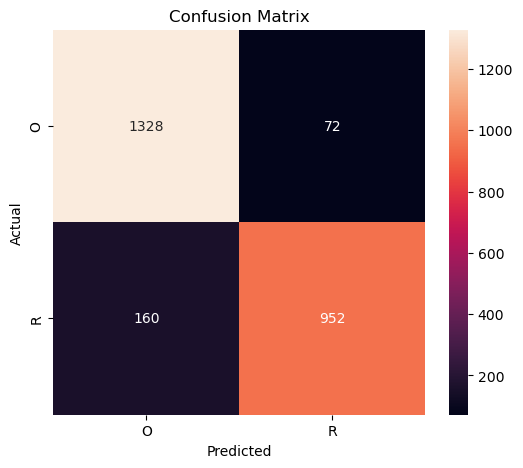


✅ Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1400
           1       0.93      0.86      0.89      1112

    accuracy                           0.91      2512
   macro avg       0.91      0.90      0.91      2512
weighted avg       0.91      0.91      0.91      2512



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=[class_map[i] for i in sorted(class_map)],
    yticklabels=[class_map[i] for i in sorted(class_map)]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n✅ Classification Report:\n")
print(classification_report(true_labels, pred_labels))


In [13]:
import os, shutil

output_folder = "misclassified_images"
os.makedirs(output_folder, exist_ok=True)

dataset_test = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET\TEST"

count = 0
for fname, actual, pred in zip(filenames, true_labels, pred_labels):
    if actual != pred:
        src = os.path.join(dataset_test, fname)
        dst = os.path.join(output_folder, os.path.basename(fname))
        shutil.copy(src, dst)
        count += 1

print(f"✅ Misclassified images stored: {count}")


✅ Misclassified images stored: 232


In [15]:
%%writefile app.py
import streamlit as st
from keras.models import load_model
from keras.utils import load_img, img_to_array
import numpy as np

st.title("♻️ Sustainability Waste Classification - CNN Model")

model = load_model("sustainable_image_cnn.keras")

uploaded_file = st.file_uploader("Upload Waste Image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    img = load_img(uploaded_file, target_size=(150,150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    result = "Recyclable (R)" if prediction >= 0.5 else "Organic / Non-Recyclable (O)"
    probability = prediction if prediction >= 0.5 else 1 - prediction

    st.image(img, caption=f"Prediction: {result} | Confidence: {probability:.3f}")



Writing app.py
